*The better you know your data, the better you can model.*

## WiDS Datathon 2021


**Objective of this Notebook:** 
* To understand the data, distribution and categories (diagram representation).
* To perform Univariate Statistical Analysis on the data as part of EDA(Exploratory data analysis) process. I will take few variables from some category and perform analysis to demonstrate the analysis workflow.
* To perform Multivariate Statistical Analysis.

### Table of Contents
1. [Know your data](#id1)
2. [Descriptive Statistics](#id2)
3. [Univariate Insights](#id3)
    - [CATEGORY: IDENTIFIERS](#sub1)
    - [CATEGORY: TARGET VARIABLE](#sub2)
    - [CATEGORY: DEMOGRAPHICS](#sub3)
    
    -- [Distribution and Skewness](#skewness)
    
    -- [Kurtosis](#kurtosis)
    
    - [CATEGORY: APACHE COVARIATE](#sub4)
    - [CATEGORY: APACHE COMORBIDITY](#sub5)
    - [CATEGORY: VITALS](#sub6)
4. [Multivariate Insights](#id4)

<a id="id1"></a>
### Know your data
The data given has 181 columns, that can be categorised in 8 distinct categories. Following is a diagram representation of data with its categories.
The diagram is produced as per info given in data dictionary that is very useful. 
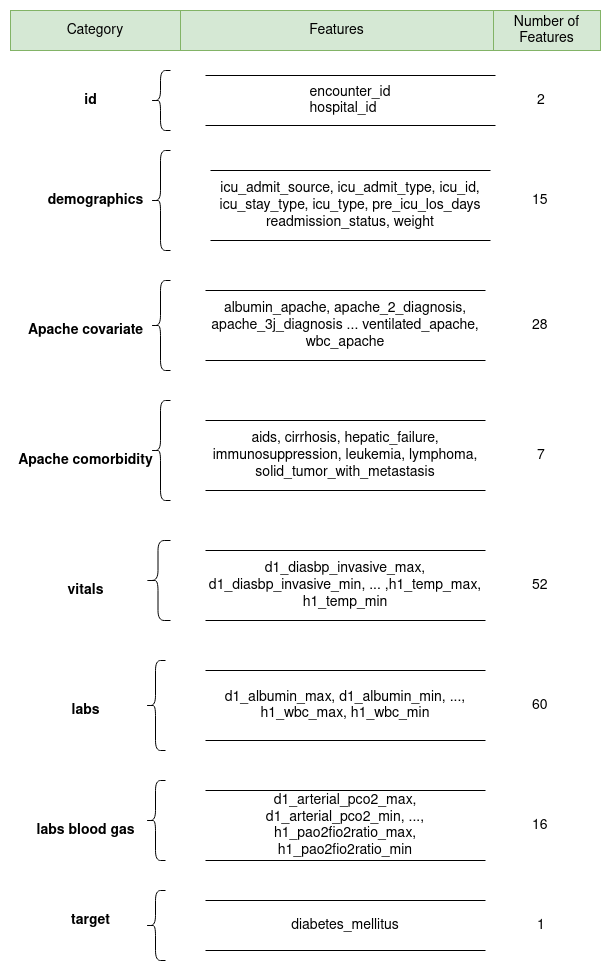

*Note :- Three categories (Vitals, labs and labs blood gas) have 52, 60 and 16 features respectively. But they actually have features reported as min and max. For example: h1_wbc has been measured and reported as h1_wbc_min and h1_wbc_max.*

In [1]:
# Import neccessay libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', 100)
pd.set_option('max_rows', 50)


In [2]:
# Read train and test csv files to dataframes
train = pd.read_csv('../input/widsdatathon2021/TrainingWiDS2021.csv')
test = pd.read_csv('../input/widsdatathon2021/UnlabeledWiDS2021.csv')
train.shape, test.shape

((130157, 181), (10234, 180))

In [3]:
# Lets have a quick look at train
train.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,...,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,...,9.0,9.0,8.6,8.6,0.56,0.56,145.0,143.0,27.0,27.0,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0,NaN,NaN,NaN,88.0,48.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,NaN,34.8,NaN,1,8.0,62.0,30.0,48.0,42.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0,NaN,NaN,NaN,99.0,57.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Columns: 181 entries, Unnamed: 0 to diabetes_mellitus
dtypes: float64(157), int64(18), object(6)
memory usage: 179.7+ MB


*Note :- The datatypes are float, int (numeric types) and 6 features are being identified as object.*

<a id="id2"></a>
### Descriptive Statistics

In [5]:
# Start with descriptive statistics on the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,130157.0,65079.000000,37573.233831,1.000000,32540.000000,65079.000000,97618.000000,130157.00000
encounter_id,130157.0,213000.856519,38109.828146,147000.000000,180001.000000,213014.000000,246002.000000,279000.00000
hospital_id,130157.0,106.102131,63.482277,1.000000,49.000000,112.000000,165.000000,204.00000
age,125169.0,61.995103,16.822880,0.000000,52.000000,64.000000,75.000000,89.00000
bmi,125667.0,29.110260,8.262776,14.844926,23.598006,27.564749,32.803127,67.81499
...,...,...,...,...,...,...,...,...
immunosuppression,130157.0,0.025669,0.158146,0.000000,0.000000,0.000000,0.000000,1.00000
leukemia,130157.0,0.007307,0.085166,0.000000,0.000000,0.000000,0.000000,1.00000
lymphoma,130157.0,0.004187,0.064574,0.000000,0.000000,0.000000,0.000000,1.00000
solid_tumor_with_metastasis,130157.0,0.020852,0.142888,0.000000,0.000000,0.000000,0.000000,1.00000


### Observations

* To start with target variable (diabetes_mellitus), its a binary type. Different datatypes are there but most are of numeric type. 
* Analysis shows that few variables like age have min value of 0,  which could be either missing value or outlier. Similary max value of other variables like bmi is too high. We need to carefully analyse these variable using dependent factors like height and weight for bmi. 
* Pre_icu_los_days have min value as negative. 
* Variance among many variables are very high, so scaling could be useful in this scenario. 
* Looking at the various medics related variables, it would be useful if we bin values in different groups. For example: heart_rate can be binned as normal (60-100 beats per minute), lower than normal and higher than normal.

<a id="id3"></a>
### Univariate Insights

<a id="sub1"></a>
**CATEGORY: IDENTIFIERS**

In [6]:
print(train.shape)
print(train.encounter_id.nunique())
print(train.hospital_id.nunique())

(130157, 181)
130157
204


*Note :- Encounter_id is unique for each row as its also stated in data dictionary that its id of patient for unit stay. We won't include this column for training our model because it have no significance for model. Although it could be useful while grouping multiple columns by id.*

*hospital_id suggests there are 204 unique hospitals. This could be useful in grouping cases per hospital. New feature possibility here.*

<a id="sub2"></a>
**CATEGORY: TARGET VARIABLE**

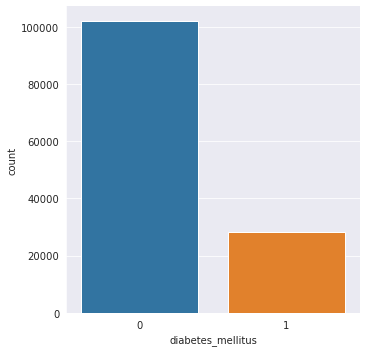

In [7]:
sns.catplot(x ='diabetes_mellitus', kind ='count',data = train)

In [8]:
# Imbalance Ratio
train.diabetes_mellitus.value_counts(normalize=True)

0    0.783715
1    0.216285
Name: diabetes_mellitus, dtype: float64

*Note :- Target variable: diabetes_mellitus is imbalanced with 78.3 % reported as no diabetes and 21.6 % have diabetes.*

*Since its a imabalanced dataset, a good cross validation strategy needed.*

<a id="sub3"></a>
**CATEGORY: DEMOGRAPHICS**

In [9]:
# Function to plot distribution of variable and boxplot

def plot_dist_box(df, colname):
    fig,axes = plt.subplots(nrows=2,ncols=2, figsize = (12,8))
    
    #Plot distributions
    plot00 = sns.distplot(df[colname],ax=axes[0][0])
    axes[0][0].set_title('Distribution of {name}'.format(name=colname))
  
    plot01=sns.distplot(df[df['diabetes_mellitus']==False][colname],ax=axes[0][1],label='Non Diabetes')
    sns.distplot(df[df.diabetes_mellitus==True][colname],ax=axes[0][1],color='red',label='Diabetes')
    axes[0][1].set_title('Distribution of {name}'.format(name=colname)) 
    plot01.axes.legend()
    
    # Boxplots
    plot10=sns.boxplot(df[colname],ax=axes[1][0])
    plot11=sns.boxplot(x='diabetes_mellitus',y=colname,data=df,ax=axes[1][1])
    plt.xticks(ticks=[0,1],labels=['Non-Diabetes','Diabetes'])
    axes[1][1].set_xlabel('Category')  
    plt.show()

**Variable: bmi**

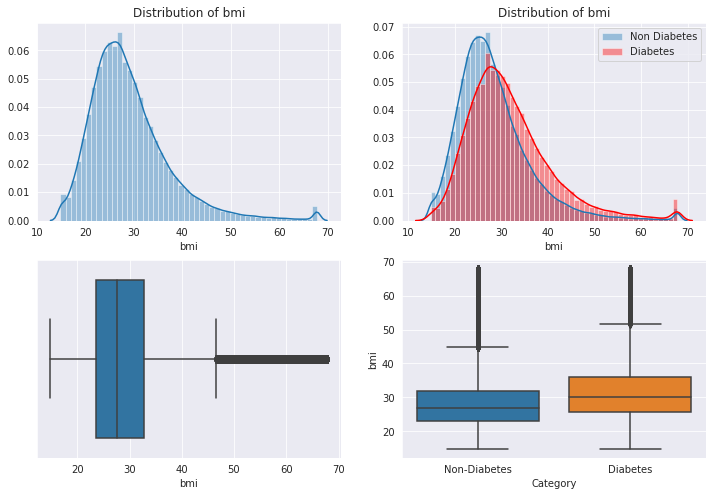

In [10]:
plot_dist_box(train, 'bmi')

*Note :- Distribution is almost symmetric with most data between 24-32. There are some outliers present on higher end.*

**Variable: Age**

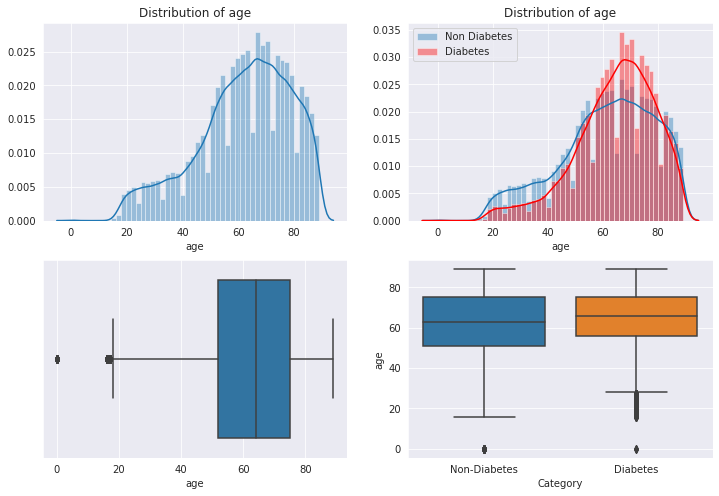

In [11]:
plot_dist_box(train, 'age')

*Note :- Age Distribution has deviation from normal distribution. It is left skewed (Negative skewness) distribution with most data between 50-75 years. There are some outliers present on lower end (Age=0)*

*About Distributions*

<a id="skewness"></a>
### Distributions and Skewness
*Credit: Google Image*
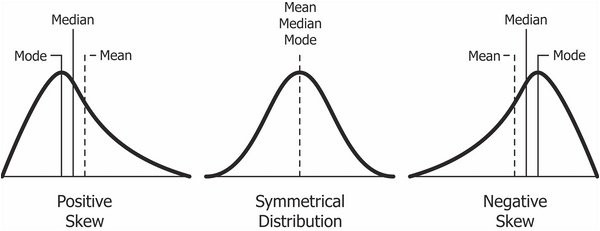

* Normal distribution
* Positive skewness (Right skewed) : Mean and median will be greater than mode.
* Negative skewness (Left skewed) : Mean and median will be less than mode.

In [12]:
# Lets verify this for age variable
print(train.age.mean())
print(train.age.median())
print(train.age.mode()[0])

61.99510262125606
64.0
67.0


*As evident from mean, median and mode of age variable, its negative skewed.*

In [13]:
#lets check skewness value rather than just estimating from figure
print("Skewness= ", train['age'].skew())

Skewness=  -0.608436408837161


*Since skewness value is between -1 and -0.5, the data (age) is moderately skewed.*

<a id="kurtosis"></a>
### Kurtosis

*Lets see another term, Kurtosis*

*Kurtosis is measure of outliers in a data*

*Credit: Google image*
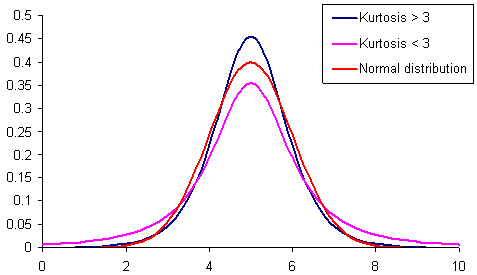

In [14]:
# check kurtosis value
print("Kurtosis= ", train['age'].kurt())

Kurtosis=  -0.21349534669057668




*Since kurtosis value <3, Distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than normal distribution.*

*Kindly refer to this article for more info on*
[Skewness and kurtosis article](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa)

<a id="sub4"></a>
**CATEGORY: APACHE COVARIATE**

**Variable: albumin_apache**

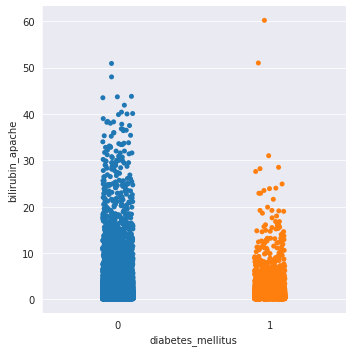

In [15]:
sns.catplot(y='bilirubin_apache', x= 'diabetes_mellitus', data=train)

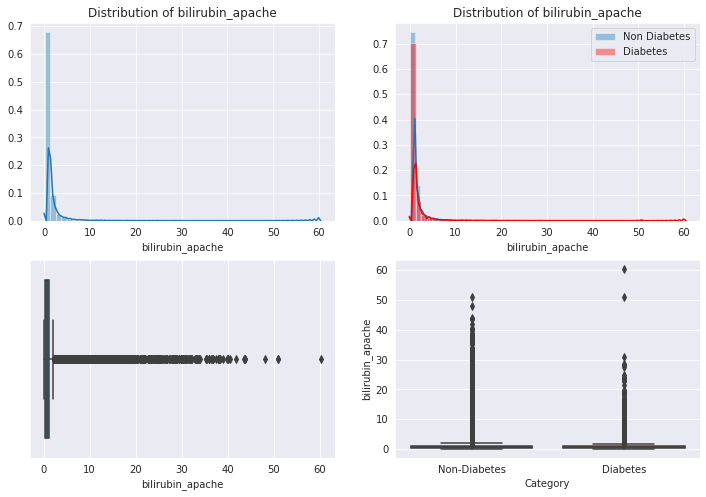

In [16]:
plot_dist_box(train, 'bilirubin_apache')

*Note :- Bilirubin_apache Distribution is not symmetric. It is right skewed distribution. There are many outliers present on lower higher end.*

*We also need to search for normal range of these medical metrics and then create different group like normal range, higher than normal and lower than normal. For bilirubin_apache Normal range is 5.13-20.52 micromol/L, anything above than will be considered as the case of hyperbilirubinemia.*

<a id="sub5"></a>
**CATEGORY: APACHE COMORBIDITY**

**Variable: hepatic_failure, aids, lymphoma**

In [17]:
train.groupby(['hepatic_failure','diabetes_mellitus']).size()

hepatic_failure  diabetes_mellitus
0                0                    100678
                 1                     27709
1                0                      1328
                 1                       442
dtype: int64

In [18]:
train.groupby(['aids','diabetes_mellitus']).size()

aids  diabetes_mellitus
0     0                    101883
      1                     28140
1     0                       123
      1                        11
dtype: int64

In [19]:
train.groupby(['lymphoma','diabetes_mellitus']).size()

lymphoma  diabetes_mellitus
0         0                    101578
          1                     28034
1         0                       428
          1                       117
dtype: int64

<a id="sub6"></a>
**CATEGORY: VITALS**

**Variable: h1_spo2_max**

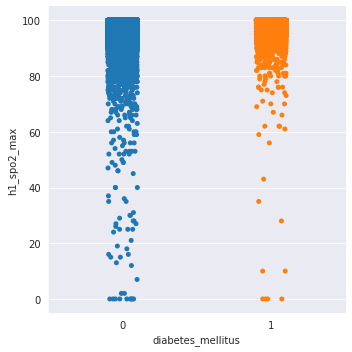

In [20]:
sns.catplot(y='h1_spo2_max', x= 'diabetes_mellitus', data=train)

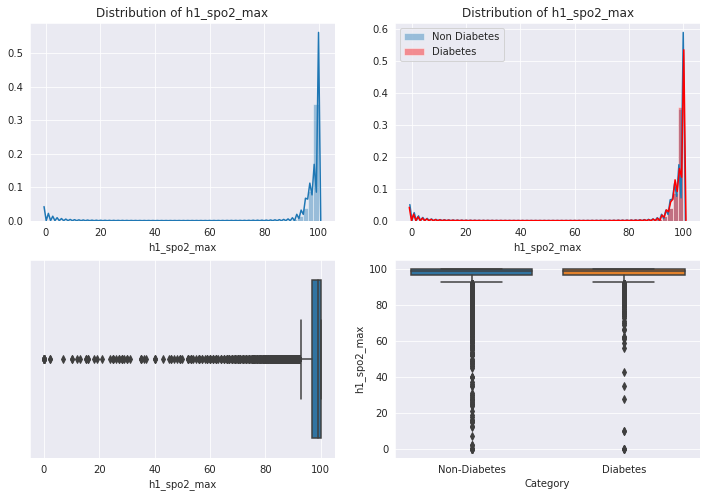

In [21]:
plot_dist_box(train, 'h1_spo2_max')

<a id="id4"></a>
### Multivariate Insights

*Unlike univariate where we take one variable at a time and analyze it, In multivariate we take multiple variables (features) at the same time and analyze patterns. Multivariate can help us analyze more complex patterns in the data and thus its closer to real world scenarios.*

**Pairplot with hue**

*Pairplot is an effective way to get relations b/w features. But instead of using simple pairplot lets put a third factor 'target variable' as hue.*

<Figure size 432x360 with 0 Axes>

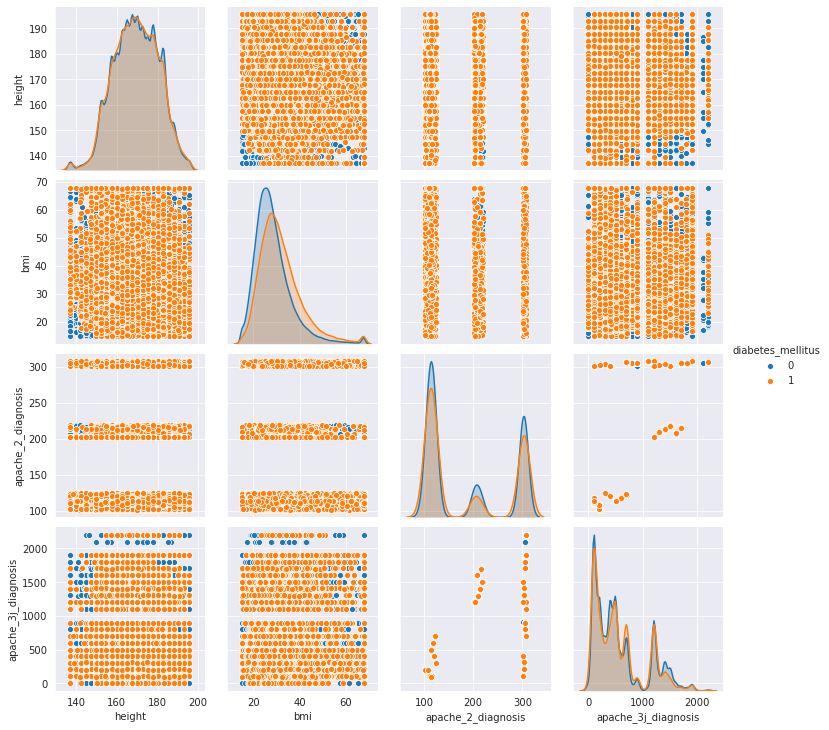

In [22]:
# Pairplot
# Since we have very large number of features, lets take few features only to understand the workflow
plt.figure(figsize= (6,5))
sns.pairplot(train[['height','bmi','apache_2_diagnosis','apache_3j_diagnosis','diabetes_mellitus']],hue = 'diabetes_mellitus')
plt.show()

*Scatter plot above are very hard to read because of very large number of datapoints.*

*Lets see how we can sample from the original data and then use sampled data to plot.*

In [23]:
# Sampling 2000 data points from train
sampletrain= train.sample(2000)

<Figure size 360x288 with 0 Axes>

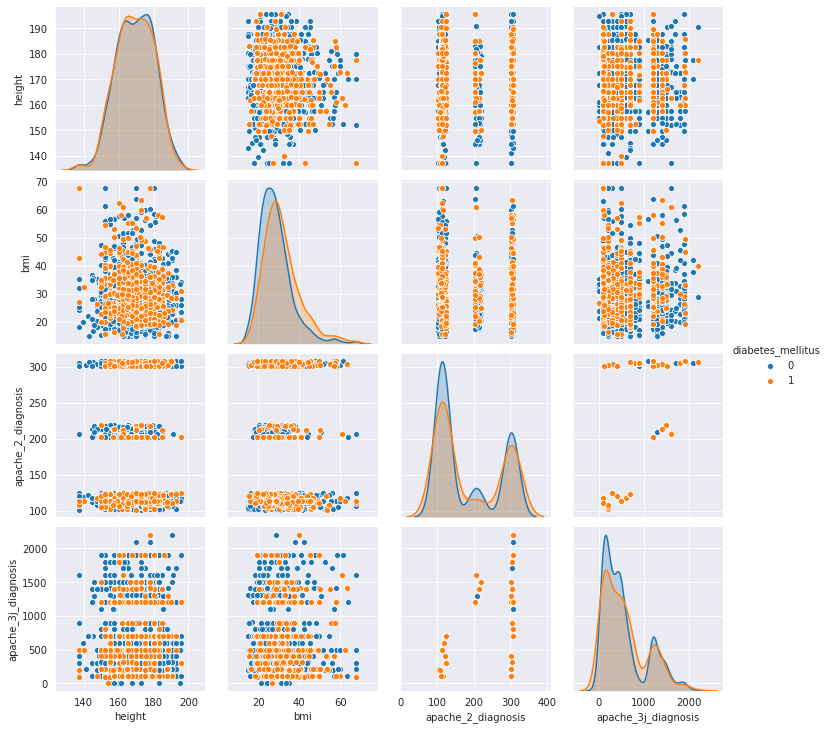

In [24]:
# plotting on sample of dataset coz data is huge 

plt.figure(figsize= (5,4))
sns.pairplot(sampletrain[['height','bmi','apache_2_diagnosis','apache_3j_diagnosis','diabetes_mellitus']],hue = 'diabetes_mellitus')
plt.show()

*From above pairplot, The distribution are bi-modal and multimodal in some cases. Data points are not separable linearly, linear model not gonna perform well in this case, tree model can identify those non-linear boundaries. There is no strong correlation between features.*

*I will keep on updating this notebook and give more insights.*

**Comment for suggestions or feedback to improve it further**

**Thank you for making it till the end, Please upvote the notebook, if it was useful :)**